# Econ 7720 Kaggle Contest -- Banking Recovery

Sanjay, Mallika and Yuchen worked on models section;

Mallika worked on descriptive analytics.


## Read in data

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import modules
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/bank_data.csv")

# Look at first few rows of dataset
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [ ]:
# check num of rows
df.shape

(1882, 6)

We aim to investigate the cost-benefit of the strategy at Level 1 (with threshold $1000), so we filter the customers with Level 0 and Level 1 Recovery strategy.

In [ ]:
my_df = df[(df['recovery_strategy'] == 'Level 0 Recovery') | (df['recovery_strategy'] == 'Level 1 Recovery')]
# check num of rows
my_df.shape

(917, 6)

In [ ]:
my_df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


## Data descriptive analytics

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/bank_data.csv")

In [ ]:
# Calculate descriptive statistics for all numeric columns
numeric_stats = data.describe()

# Calculate descriptive statistics for categorical columns
categorical_stats = data.select_dtypes(include=['object']).describe()

# Print the statistics
print(numeric_stats)
print(categorical_stats)

                id  expected_recovery_amount  actual_recovery_amount  \
count  1882.000000               1882.000000             1882.000000   
mean   1035.596174               2759.967588             4000.967837   
std     591.458429               2019.826565             4576.506350   
min       6.000000                194.000000              200.425000   
25%     534.250000               1261.250000             1045.190300   
50%    1029.500000               2062.000000             2115.446373   
75%    1551.750000               3569.500000             5417.237207   
max    2056.000000               9964.000000            34398.479710   

               age  
count  1882.000000  
mean     39.650372  
std      15.453072  
min      18.000000  
25%      28.000000  
50%      35.000000  
75%      50.000000  
max      84.000000  
       recovery_strategy   sex
count               1882  1882
unique                 5     2
top     Level 1 Recovery  Male
freq                 670   973


In [ ]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

     id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0  2030                       194                 263.540  Level 0 Recovery   
1  1150                       486                 416.090  Level 0 Recovery   
2   380                       527                 429.350  Level 0 Recovery   
3  1838                       536                 296.990  Level 0 Recovery   
4  1995                       541                 346.385  Level 0 Recovery   

   age     sex  
0   19    Male  
1   25  Female  
2   27    Male  
3   25    Male  
4   34    Male  


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64


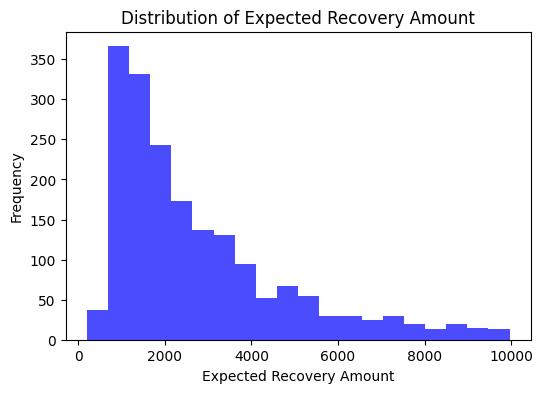

In [ ]:
import matplotlib.pyplot as plt

# Histogram for expected_recovery_amount
plt.figure(figsize=(6, 4))
plt.hist(data['expected_recovery_amount'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Expected Recovery Amount')
plt.show()

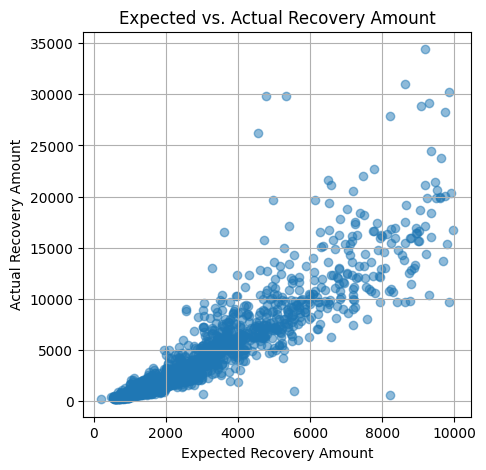

In [ ]:
# Scatter plot for expected vs. actual recovery amount
plt.figure(figsize=(5, 5))
plt.scatter(data['expected_recovery_amount'], data['actual_recovery_amount'], alpha=0.5)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Expected vs. Actual Recovery Amount')
plt.grid(True)
plt.show()

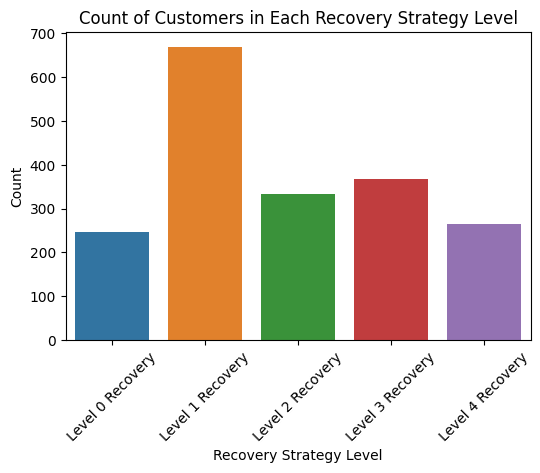

In [ ]:
import seaborn as sns
# Bar plot for recovery strategy count
plt.figure(figsize=(6, 4))
sns.countplot(x='recovery_strategy', data=data)
plt.xlabel('Recovery Strategy Level')
plt.ylabel('Count')
plt.title('Count of Customers in Each Recovery Strategy Level')
plt.xticks(rotation=45)
plt.show()

## Model

We want to investigate the causal effects of recovery strategy through two methods: Regression Discontinuity Design (RDD) and Propensity Score Matching (PSM).

**Sanjay**

In RDD, we firstly prove sex and age and independent of actual recovery amount, and then explore the effects of the elevated Recovery Strategy (Similar steps with Kaggle contest https://www.kaggle.com/code/lchipham/bank-debt-determine-debts-worth-collecting/notebook)

**Yuchen**

In PSM, we can use matching strategy to account for the effects of age, sex, and expected recovery amount, and check whether the elevated Recovery Strategy is worth $50.

### Regression Discontinuity Design (RDD)
Like local randomized trial

A regression discontinuity design (RDD) is a quasi-experimental pretest-posttest design that aims to determine the causal effects of interventions by assigning a cutoff or threshold above or below which an intervention is assigned. By comparing observations lying closely on either side of the threshold, it is possible to estimate the average treatment effect in environments in which randomisation is unfeasible.

#### Effects of Age and Sex

We aim to verify the similarity of variables such as age and sex both above and below the $1000 Expected Recovery Amount threshold. This verification is crucial to ensure that any disparities in the actual recovery amount are attributed to the elevated Recovery Strategy rather than other factors, such as age or sex.

##### Age

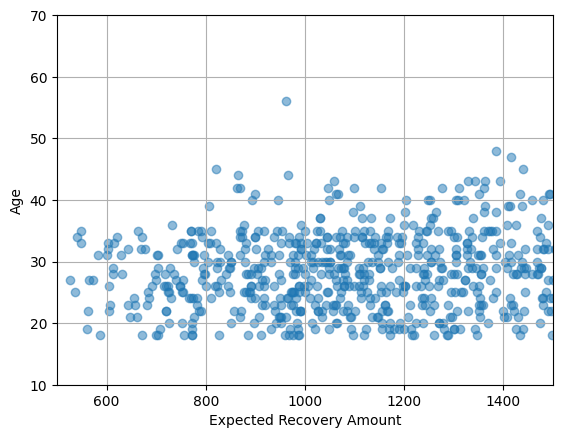

In [ ]:
# Scatter plot for expected recovery amount between 500 and 1500
plt.scatter(df['expected_recovery_amount'], df['age'], alpha=0.5)
plt.xlim(500, 1500)
plt.ylim(10, 70)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.grid(True)
plt.show()

**In** the above plot, we do not see any obvious jump around the $1000 mark on the x-axis. Hence, we need to determine this statisticallly using Kruskal-Wallis H-test. The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. [[ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)]

In [ ]:
from scipy import stats

# Filter for values around $1000 for expected recovery amount
threshold_vals = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]

# Filter for age when level is 0 or 1
level_0_recovery = threshold_vals.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
level_1_recovery = threshold_vals.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']

# Perform Kruskal-Wallis H-test
stats.kruskal(level_0_recovery, level_1_recovery)

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

Here, the p-value is 0.0629 or 6.29% which means that we cannot reject the null-hypothesis that the average age in recovery strategy for level 0 and level 1 are equal. (Assuming a statistical significance of 5%)

Therefore, the age distribution is similar above and below the $1000 expected recovery amount threshold.

##### Sex

We create a contingency table with number of males and females around the threshold of $1000 for Level 0 and Level 1 recovery strategy

In [ ]:
contingency_table = pd.crosstab(df.loc[(df['expected_recovery_amount']<1100) &
                              (df['expected_recovery_amount']>=900)]['recovery_strategy'], df['sex'])
contingency_table

sex,Female,Male
recovery_strategy,,
Level 0 Recovery,32,57
Level 1 Recovery,39,55


Next, we run a Chi-square test to examine if the two categorical variables - sex and recovery_strategy are dependent

In [ ]:
chi2_stat, p_value, dof, ex = stats.chi2_contingency(contingency_table)
print(f'p-value = {p_value}')

p-value = 0.5377947810444592


Here, we see that the p-value is 0.53 or 53% which well above the statistically significant threshold of 0.05 or 5%. So we cannot reject the null hypothesis that there is no significant differrence in the means of values of the categorical variables.

Thus, sex does not play a significant role in influencing the expected recovery amount around the threshold of $1000

#### Regression Model

In this section, we model a linear regression around the threshold of $1000 of expected recovery amount to determine the additional actual amount recovered.

The regression model is denoted by:

$\text{actual_recovery_amount} = \beta_0 + \beta_1 \cdot \text{expected_recovery_amount} + \beta_2 \cdot \text{era_ge_1000} + \epsilon$

First, we use `threshold_vals` from the previous section which filters values around the threshold, i.e [900,1100]. Then, we craete a new variable to indicate whether the expected recovery amount was above or below the threshold. Finally, we run linear regression using Ordinary Least Squares estimate to determine the additional recovered amount.

In [ ]:
import statsmodels.api as sm

# Create a column to indicate if expected recovery amount >= 1000
threshold_vals['era_ge_1000'] = (threshold_vals['expected_recovery_amount'] >= 1000).astype(int)

y = threshold_vals['actual_recovery_amount']
X = sm.add_constant(threshold_vals[['expected_recovery_amount', 'era_ge_1000']])

# Create linear regression model using OLS
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Fri, 01 Dec 2023   Prob (F-statistic):           1.83e-15
Time:                            21:27:18   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
era_ge_1000                277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above result, we are interested in the  co-efficient value of `era_ge_1000`, $\beta_2$. It indicates that an additional amount of \$277.63 was recovered from population whose expected recovery amount was greater than $1000.

Note that this value is statistically significant with t-value 3.75 which is greater than 2 and p-value of 0.0 which is less than 0.05.

The additional recovery level costs \$50 more.

Here, we see that an additional amount of \$277.63 is recovered which far exceeds the cost to the bank.

Therefore, the bank can use the higher recovery strategy to recover the amount from customers above the expected recovery threshold of \$1000.

To visualize RDD at the threshold, we plot the following graph:

Text(0.5, 1.0, 'Regression Discontinuity at Threshold of $1000 ')

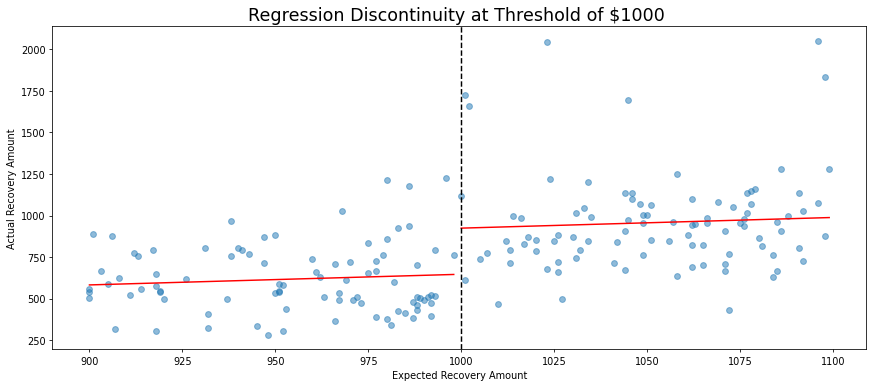

In [ ]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(15, 6), dpi=70, facecolor='w', edgecolor='k')
plt.scatter(threshold_vals.expected_recovery_amount,threshold_vals.actual_recovery_amount, alpha=0.5)
l=threshold_vals[threshold_vals.expected_recovery_amount<1000].expected_recovery_amount.count()
plt.plot(threshold_vals.expected_recovery_amount[0:l], lm.predict()[0:l], '-', color="r")
plt.plot(threshold_vals.expected_recovery_amount[l:],
lm.predict()[l:], '-', color="r")
plt.axvline(x=1000,color="black", linestyle="--")
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Regression Discontinuity at Threshold of $1000 ", fontsize="18")


To bolster our findings, we now select a different threshold [970, 1020] and ensure that we find similar significant values.

In [ ]:
threshold_vals = df.loc[(df['expected_recovery_amount']<=1020) & (df['expected_recovery_amount']>=970)]
# Create a column to indicate if expected recovery amount >= 1000
threshold_vals['era_ge_1000'] = (threshold_vals['expected_recovery_amount'] >= 1000).astype(int)

y = threshold_vals['actual_recovery_amount']
X = sm.add_constant(threshold_vals[['expected_recovery_amount', 'era_ge_1000']])

# Create linear regression model using OLS
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.217
Model:                                OLS   Adj. R-squared:                  0.185
Method:                     Least Squares   F-statistic:                     6.794
Date:                    Fri, 01 Dec 2023   Prob (F-statistic):            0.00249
Time:                            21:27:26   Log-Likelihood:                -364.05
No. Observations:                      52   AIC:                             734.1
Df Residuals:                          49   BIC:                             740.0
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5241.2505   5216.615      1.005      0.320   -5241.930    1.57e+04
expected_recovery_amount    -4.6875      5.301     -0.884      0.381     -15.341       5.966
era_ge_1000                418.7184    163.056      2.568      0.013      91.045     746.392
==============================================================================
Omnibus:                       14.367   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.578
Skew:                           1.218   Prob(JB):                     0.000414
Kurtosis:                       4.121   Cond. No.                     1.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above regression, we find that `era_ge_1000` has a coefficient of 418.71. This indicates an additional amount of \$418.72 was recovered from population whose expected recovery amount was greater than $1000.

This value is statistically significant with t-value of 163.05 which is greater than 2 and p-value of 0.013 which is less than statistically sigificant threshold of 0.05.

### Propensity Score Matching (PSM)

Here, we used a another method to solve the problem -- PSM. Although we have shown age and sex are not significantly different among participants with Level-0 recovery strategy and Level-1 recovery strategy, we can still use PSM to make the data free from confounding.

Let's see what the difference in means $E[Y|T=1]-E[Y|T=0]$ looks like. This will be a useful baseline to compare against. Here, we did not consider any confounders.

Mean of *actual_recovery_amount* among Level-0 Recovery Strategy

In [ ]:
# Filter the DataFrame based on the level you're interested in (level=0)
filtered_df = my_df[my_df['recovery_strategy'] == 'Level 0 Recovery']

# Calculate the mean of the 'actual_recovery_amount' column for the selected level
mean_value = filtered_df['actual_recovery_amount'].mean()

print(f"Mean of actual recovery amount for level 0: {mean_value}")

Mean of actual recovery amount for level 0: 521.0271255060728


Mean of actual_recovery_amount among Level-1 Recovery Strategy

In [ ]:
# Filter the DataFrame based on the level you're interested in (level=1)
filtered_df = my_df[my_df['recovery_strategy'] == 'Level 1 Recovery']

# Calculate the mean of the 'actual_recovery_amount' column for the selected level
mean_value = filtered_df['actual_recovery_amount'].mean()

print(f"Mean of actual recovery amount for level 1: {mean_value}")

Mean of actual recovery amount for level 1: 1301.689328782985


**We** can also see the difference through a simple linear regression shown as below:

In [ ]:
import statsmodels.formula.api as smf
smf.ols("actual_recovery_amount ~ recovery_strategy", data=my_df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,521.0271,27.413,19.007,0.000,467.228,574.827
recovery_strategy[T.Level 1 Recovery],780.6622,32.070,24.342,0.000,717.722,843.602


Simply comparing those with Level-1 strategy and with Level-0 strategy, we can see that the Level-1 have an actual recovery amount that is, on average, 1301.69 higher than the average recovery amount 521.03 for Level-0 strategy. And the difference is significant because we have p-value for t-test is less than 0.05. However, this is only for a rough comparison, we did not consider any confounding variables, like age, sex and expected_recovery_amount.

We can also visualize the difference as below:

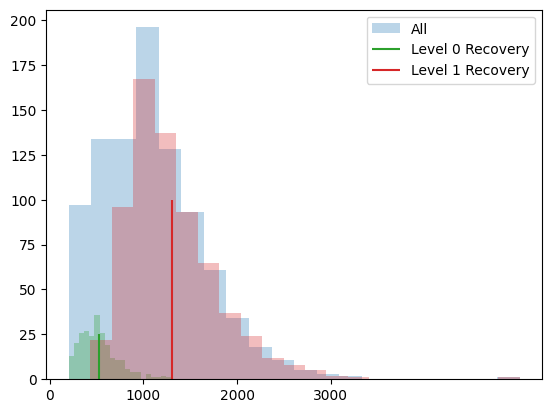

In [ ]:
from matplotlib import pyplot as plt
plt.hist(my_df["actual_recovery_amount"], bins=20, alpha=0.3, label="All")
plt.hist(my_df.query("recovery_strategy=='Level 0 Recovery'")["actual_recovery_amount"], bins=20, alpha=0.3, color="C2")
plt.hist(my_df.query("recovery_strategy=='Level 1 Recovery'")["actual_recovery_amount"], bins=20, alpha=0.3, color="C3")
plt.vlines(521.02712, 0, 25, label="Level 0 Recovery", color="C2")
plt.vlines(1301.68932, 0, 100, label="Level 1 Recovery", color="C3")
plt.xticks(np.arange(0, 3200, 1000))
plt.legend();

We can see the difference of actual recovery amount between Level-0 and Level-1 is quite large (about $780). However, this difference is not the exact benefit of implementing Level-1 strategy, because the participants in Level-1 also had higher level of expected recovery amount. It is obvious that participants with higher expected recovery amount would also have higher actual recovery amount, instead of relying on the Level-1 recovery strategy. To control this bias, we could use some matching technique.

We used propensity score matching to control for the confoundings. When controlling for a balance score, i.e., propensity score $e(x)$, we can achieve independence of the potential outcomes (actual recovery amount) on the treatment (recovery strategy, Level 1 vs. Level 0).

$$(Y_1, Y_0)\perp T | e(x)$$

To estimate the propensity score $e(x)$, we used logistic regression. The outcome is Level-0 strategy or Level-1 strategy, and the variables include age, sex, and expected recovery amount.

In [ ]:
categ = ['sex']
cont = ['age', 'expected_recovery_amount']
# convert the categorical features in the dataset to dummies
df_with_categ = pd.concat([
    my_df.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(my_df[categ], columns=categ, drop_first=False)# categorical features converted to dummies
], axis=1)

print(df_with_categ.shape)

(917, 7)


In [ ]:
df_with_categ.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex_Female,sex_Male
0,2030,194,263.540,Level 0 Recovery,19,0,1
1,1150,486,416.090,Level 0 Recovery,25,1,0
2,380,527,429.350,Level 0 Recovery,27,0,1
3,1838,536,296.990,Level 0 Recovery,25,0,1
4,1995,541,346.385,Level 0 Recovery,34,0,1


Now, let’s estimate the propensity score using logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

T = 'recovery_strategy'
Y = 'actual_recovery_amount'
X = df_with_categ.columns.drop(['id', T, Y, 'sex_Male','sex_Female','age'])

lr = LogisticRegression(C=1e4)

ps_model = lr.fit(df_with_categ[X], df_with_categ[T])

data_ps = my_df.assign(propensity_score=ps_model.predict_proba(df_with_categ[X])[:, 1])

data_ps[["recovery_strategy", "actual_recovery_amount", "propensity_score"]].head()

,recovery_strategy,actual_recovery_amount,propensity_score
0,Level 0 Recovery,263.540,0.0
1,Level 0 Recovery,416.090,0.0
2,Level 0 Recovery,429.350,0.0
3,Level 0 Recovery,296.990,0.0
4,Level 0 Recovery,346.385,0.0


The positivity assumption of causal inference is that everyone needs to have at least some chance of receiving the treatment and of not receiving it. Another way of stating this is that the treated and untreated distributions need to overlap. So we select the participants whose propensity score is not 0 or 1.

In [ ]:
my_df_select = data_ps[(data_ps['propensity_score'] != 0) & (data_ps['propensity_score'] != 1)]
my_df_select.shape

(58, 7)

In [ ]:
my_df_select

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,propensity_score
192,1619,950,883.790000,Level 0 Recovery,21,Female,1.946316e-304
193,1898,950,534.910000,Level 0 Recovery,24,Male,1.946316e-304
194,212,951,543.780000,Level 0 Recovery,33,Female,2.024282e-298
195,1329,951,537.985000,Level 0 Recovery,20,Male,2.024282e-298
196,1751,951,589.435000,Level 0 Recovery,21,Male,2.024282e-298
197,560,952,581.510000,Level 0 Recovery,23,Male,2.105370e-292
198,604,952,305.275000,Level 0 Recovery,27,Female,2.105370e-292
199,1806,953,438.145000,Level 0 Recovery,35,Male,2.189707e-286
200,123,960,737.665000,Level 0 Recovery,18,Male,2.882630e-244
201,1108,961,660.175000,Level 0 Recovery,56,Male,2.998103e-238


We left 58 participants, if we check their expected_recovery_amount, their values are just around the threshold 1000 dollar. This population is also consistent with the population we used in RDD method (participants with about 1000 dollar expected recovery amount).

After we get the propensity score, all we need to do is condition on it. We can make sure that the propensity score weight indeed reconstructs a population where everyone is treated (Level 1 recovery strategy). By producing weights $1/e(x)$, it creates the population where everyone is treated and by providing the weights $1/(1-e(x))$ it creates the population where everyone is untreated.



In [ ]:
weight_t = 1/my_df_select.query("recovery_strategy=='Level 1 Recovery'")["propensity_score"]
weight_nt = 1/(1-my_df_select.query("recovery_strategy=='Level 0 Recovery'")["propensity_score"])
print("Original Sample Size", my_df_select.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 58
Treated Population Sample Size 3.0013863769314737
Untreated Population Sample Size 55.001387047462636


Finally, we can use our propensity score weighting estimator to estimate the average treatment effect.

In [ ]:
!pip install causalinference

In [ ]:
my_df_select['recovery_strategy_num'] = my_df_select['recovery_strategy'].replace({'Level 0 Recovery': 0, 'Level 1 Recovery': 1})
from causalinference import CausalModel
cm = CausalModel(
    Y=my_df_select["actual_recovery_amount"].values,
    D=my_df_select["recovery_strategy_num"].values,
    X=my_df_select[["propensity_score"]].values
)

cm.est_via_matching()

print(cm.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE    524.964    355.518      1.477      0.140   -171.850   1221.779
           ATC    542.023    361.408      1.500      0.134   -166.336   1250.382
           ATT    212.219    370.652      0.573      0.567   -514.258    938.697



Propensity score weighting is saying that we should expect Level-1 individuals to be 524.964 above the Level-0 fellows, in terms of actual_recovery_amount. Considering the cost-benefit strategy, it is worth to spend extra 50 dollars to implement the Level-1 recovery strategy (Since the average treatment effect is greater than 50).